## **Can <font color='darkred'>Heart Disease</font> be predicted?**

**Analysis By:**

Lisa Desjarlais, Shreyas Goyal, and Emma Szeto _(Group 155)._

**Introduction:**
    
According to medical professionals at Johns Hopkins and Mount Sinai Health, there are five classifications of heart disease  <a href="(https://www.hopkinsmedicine.org/news/media/releases/updated_classification_system_captures_many_more_people_at_risk_for_heart_attack">(Johns Hopkins Medicine 2017)</a>. For our project we will be analyzing the <a href="https://archive.ics.uci.edu/ml/datasets/Heart+Disease">Cleveland Heart Disease Data set.</a> Class 0 indicates no presence of heart disease, while classes 1 to 4 describe mild, moderate, severe and very severe heart disease, in that order. The data was compiled using the medical information of 303 patients. Each row in the data set represents a patient with some classification of heart disease and 13 other health attributes. The goal of our project is to answer the predictive question: Can we use these health attributes available to us to predict whether a future patient (with an unknown diagnosis) has some level of heart disease?



**Preliminary Exploratory Data Analysis:**




In [33]:
# Loading in all necessary libraries.

library(tidyverse)
library(tidymodels)
library(repr)
library(GGally)
options(repr.matrix.max.rows = 10)

In [2]:
# Loading in data using tidyverse's read_csv() function.

URL <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cleveland_data <- read_csv(URL, col_names=FALSE, show_col_types = FALSE)

# Since column names aren't pre-specified, we rename them using colnames, according to the UCI repository.

colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")

cleveland_data <- cleveland_data |>
                    mutate(ca = as_factor(ca), thal = as_factor(thal), num = as_factor(num))
cleveland_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


The columns in the data represent: age, sex, chest pain type, resting blood pressure, serum cholestoral (mg/dl), fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, presence of exercise induced angina, ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by flouroscopy, presence of heart defect, and severity of heart disease.

Now, we try to find a relationship between predictor variables. 

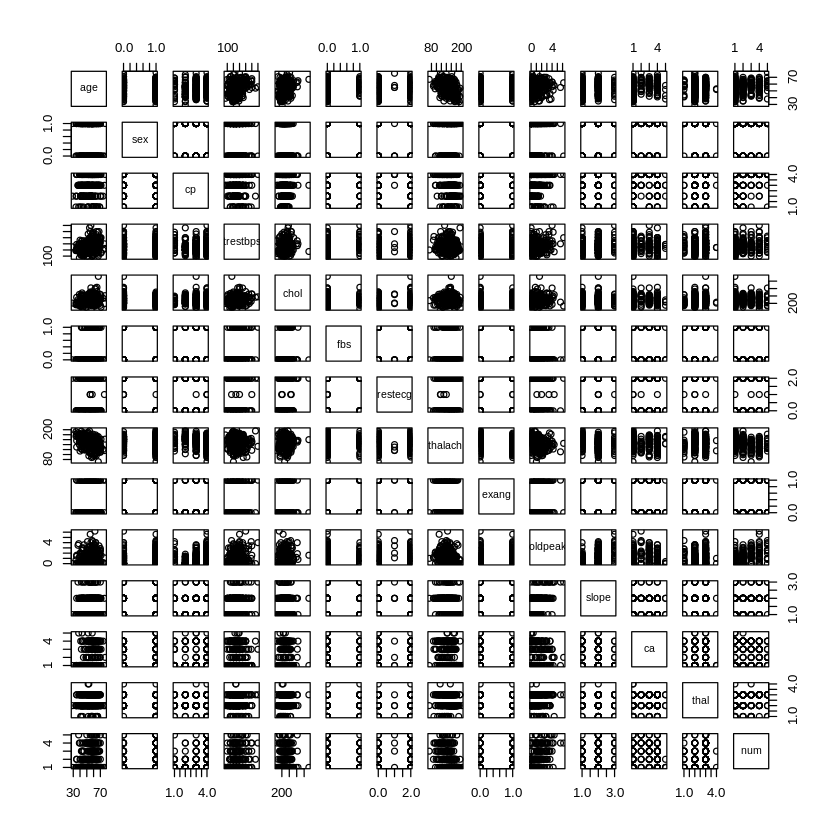

In [12]:
# Using the _pairs()_ function from the GGally library.

pairs(cleveland_data)

From this visualization, it is hard to see any clear relationships.

So, we create a larger plot of _cholesterol_ against _resting blood pressure_, with each severity of heart disease colorized and as different subplots.

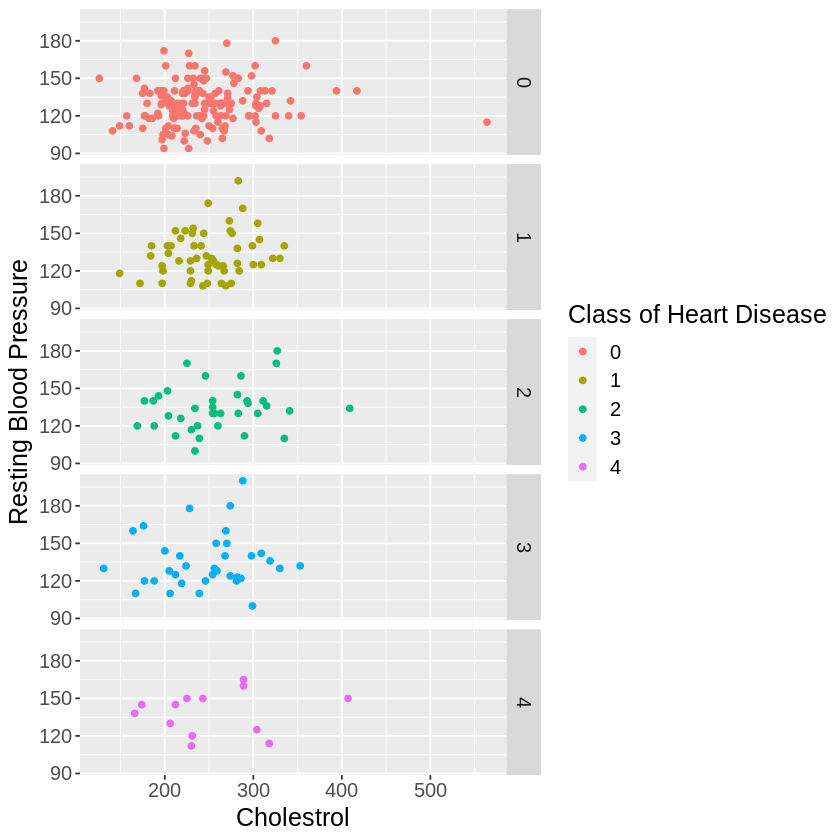

In [3]:
chol_vs_trestbps <- cleveland_data |>
                    ggplot(aes(x = chol, y = trestbps, color = num)) +
                    geom_point() +
                    facet_grid(rows = vars(num)) +
                    labs(x = "Cholestrol", y = "Resting Blood Pressure", color = "Class of Heart Disease") +
                    theme(text = element_text(size = 15))
chol_vs_trestbps

It seems there is no clear relationship between cholesterol and resting blood pressure.

We now plot age (a non-categorial variable) against num (our output variable). 

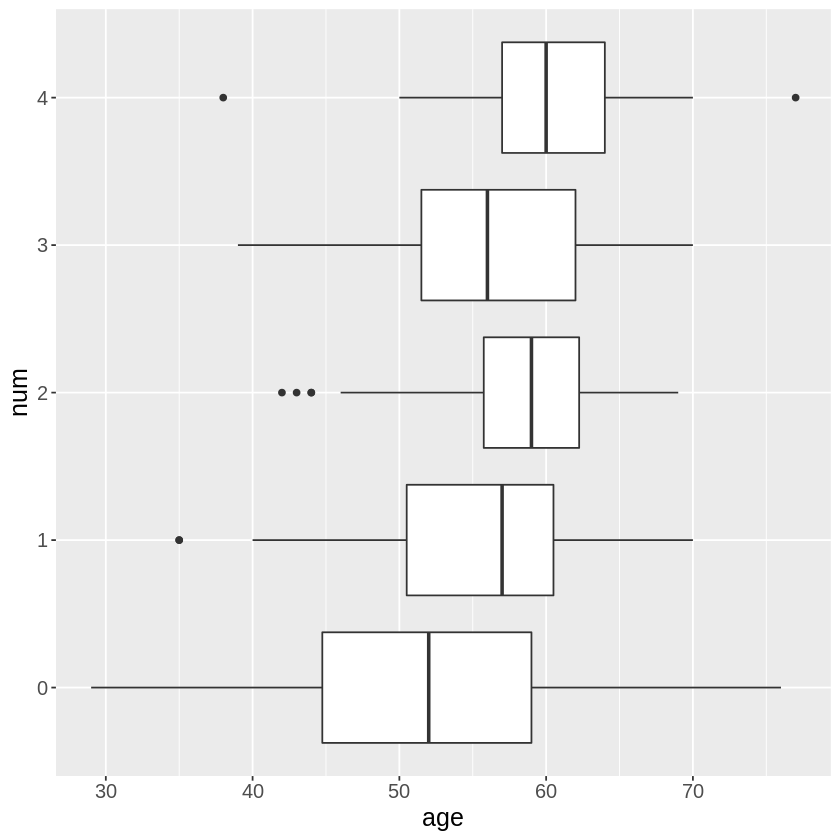

In [7]:
age_vs_num <- cleveland_data |>
                    ggplot(aes(x = age, y = num)) +
                    geom_boxplot(alpha = 1) +
                    theme(text = element_text(size = 15))

age_vs_num

From the graph above, most people with heart disease tend to lie in the 50 to 65 age group. However, we are not able to conclude how age might play a role into the severity of heart disease.

So far, we are unable to conclusively visualize a relationship between any of the predictor variables and severity of heart disease. However, we noticed there does seem to be a relationship between variables when we consider simply having heart disease (levels 1,2,3,4) to no heart disease (0).

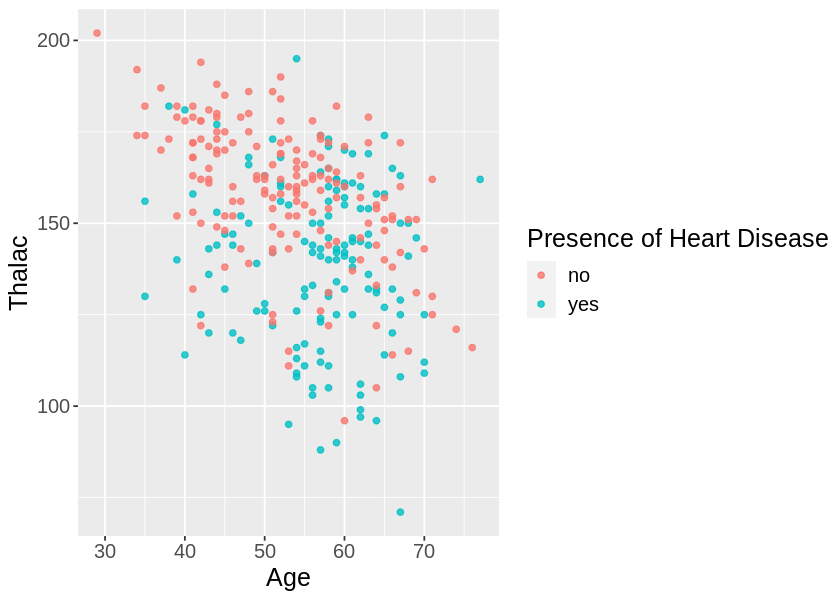

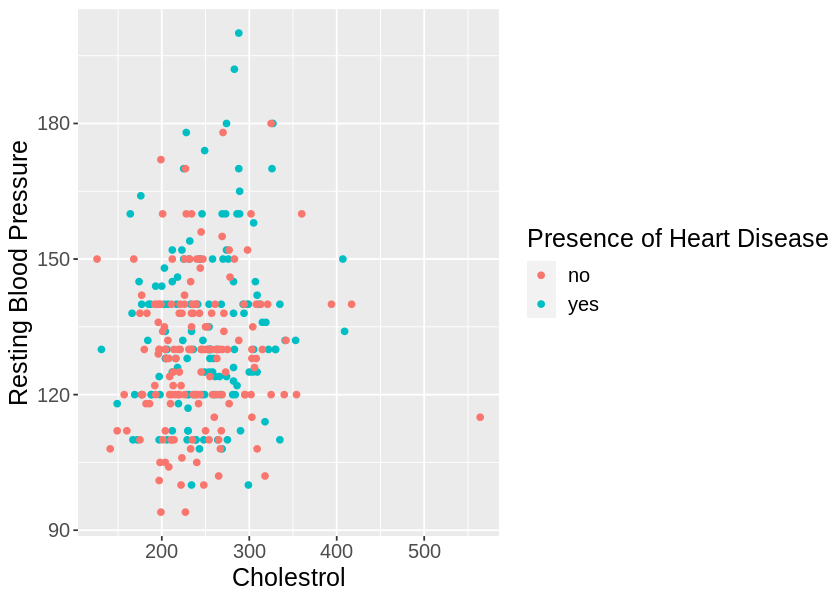

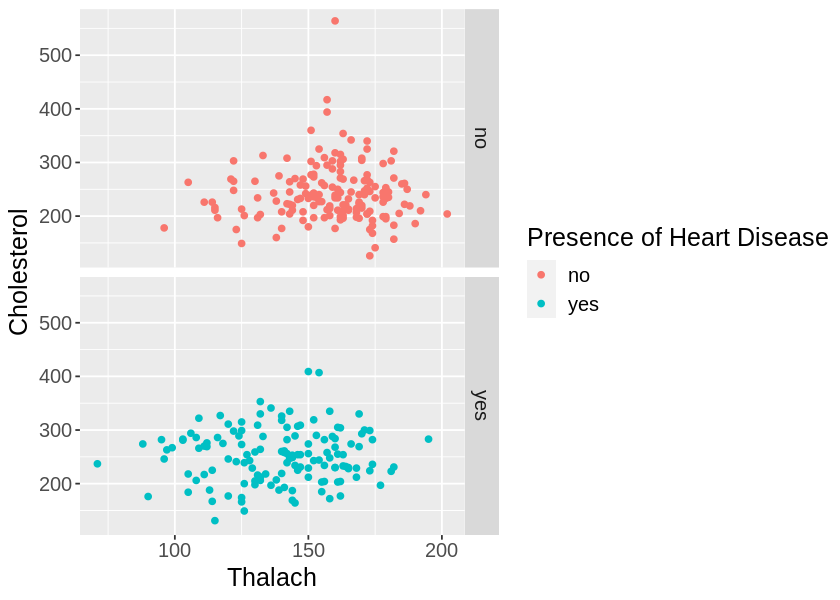

In [47]:
heart_have_disease <- cleveland_data |>
    filter(num == 1 | num == 2 | num == 3 | num == 4) |>
    mutate(hd = "yes") |>
    mutate(num_alt = as_factor(hd))
heart_no_disease <- cleveland_data |>
    filter(num == 0) |>
    mutate(hd = "no") |>
    mutate(num_alt = as_factor(hd))
heart_data_alt <- rbind(heart_have_disease, heart_no_disease)

age_vs_thalac1 <- heart_data_alt |>
                    ggplot(aes(x = age, y = thalach, color = hd)) +
                    geom_point(alpha = .8) +
                    labs(x = "Age", y = "Thalac", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
age_vs_thalac1

chol_vs_trestbps2 <- heart_data_alt |>
                    ggplot(aes(x = chol, y = trestbps, color = hd)) +
                    geom_point(alpha = 1) +
                    #facet_grid(rows = vars(hd)) +
                    labs(x = "Cholestrol", y = "Resting Blood Pressure", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
chol_vs_trestbps2

thalach_vs_chol2 <- heart_data_alt |>
                    ggplot(aes(x = thalach, y = chol, color = hd)) +
                    geom_point(alpha = 1) +
                    facet_grid(rows = vars(hd)) +
                    labs(x = "Thalach", y = "Cholesterol", color = "Presence of Heart Disease") +
                    theme(text = element_text(size = 15))
thalach_vs_chol2

A possible explanation is that there is an overwhelming amount of observations with level 0 heart disease, compared to the other levels. When we combine the levels 1-4, there is a close to even split of having heart disease to not having heart disease. Thus, we are considering changing our question to: Can we use the health attributes available to us to predict whether a future patient (with an unknown diagnosis) has heart disease?

In [26]:
# Percentages of levels 0-4
num_obs_c <- nrow(cleveland_data)
level_percentage_c <- cleveland_data |>
    group_by(num) |>
    summarize(
        count = n(),
        percentage = n() / num_obs_c * 100
        )
level_percentage_c
# Percentages of hd (yes, no) *num changed to hd
num_obs_h <- nrow(heart_data_alt)
level_percentage_h <- heart_data_alt |>
    group_by(hd) |>
    summarize(
        count = n(),
        percentage = n() / num_obs_h * 100
        )
level_percentage_h

num,count,percentage
<fct>,<int>,<dbl>
0,164,54.125413
1,55,18.151815
2,36,11.881188
3,35,11.551155
4,13,4.290429


hd,count,percentage
<chr>,<int>,<dbl>
no,164,54.12541
yes,139,45.87459


The relationships in the plots above are not strong. To hopefully find even better relationships, we can even consider multiple regions, and not just Cleveland. Thus, we may combine our binary heart disease data with data from other regions, to hopefully make a better prediction about presence of heart disease from the given variables.

In [28]:
URL2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"

hungarian_data <- read_delim(URL2, col_names = FALSE, delim = " ", show_col_types = FALSE)

colnames(hungarian_data) <- c("age", "sex", "cp", "trestbps", 
                              "chol", "fbs", "restecg", "thalach", 
                              "exang", "oldpeak", "slope", "ca", "thal", "num")

# Combine levels 1,2,3,4 into hd column. Levels 1-4 as "yes", level 0 as "no."
hung_have_disease <- hungarian_data |>
    filter(num == 1 | num == 2 | num == 3 | num == 4) |>
    mutate(hd = "yes") |>
    mutate(hd = as_factor(hd))
hung_no_disease <- hungarian_data |>
    filter(num == 0) |>
    mutate(hd = "no") |>
    mutate(hd = as_factor(hd))
hung_data_alt <- rbind(hung_have_disease, hung_no_disease)
hung_data_alt

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,hd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1,yes
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3,yes
37,1,4,140,207,0,0,130,1,1.5,2,-9,-9,1,yes
58,1,2,136,164,0,1,99,1,2.0,2,-9,-9,3,yes
49,1,4,140,234,0,0,140,1,1.0,2,-9,-9,3,yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,0,2,-9,308,0,1,-9,-9,2,1,-9,-9,0,no
36,1,2,120,166,0,0,180,0,0,-9,-9,-9,0,no
48,1,3,110,211,0,0,138,0,0,-9,-9,6,0,no


**Methods:**
    
We will be considering data from multiple regions to conclude which predictors might play the most crucial role in predicting heart disease. Upon doing so, we will then create a classifier using the K-nearest neighbours machine learning algorithm. As a part of this process, we will first split our combined regions dataset into a training and testing set, and then run a classification to determine which category (affected by heart disease or not), the patient is. We intend to be able to classify a patient (with an unknown diagnosis) with presence of heart disease and then visualize our results.

**Expected Outcomes and Significance:**

We expect to find the factors that best predict a class of heart disease. We predict increased cholesterol, resting blood pressure, and age, to have a strong relationship with a higher level of heart disease. The factors that can best predict a class of heart disease, can help identify the leading risk factors for heart disease. This information can aid health care providers in diagnostics and in care. By identifying risk factors, anyone can reduce their risk for heart disease. If a medical professional notices a patient with higher cholesterol, they may be more likely to investigate possible heart disease. These findings can lead to such questions like: What is the ideal cholesterol level to minimize risk of heart disease? And, which heart disease risk factors differ between men and women?